In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

In [4]:
#Classification (Sınıflandırma)
#Logistic Regression

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
X = dataset.drop(['Purchased','User ID','Gender'],axis=1)
y = dataset['Purchased']

In [8]:
X.shape, y.shape

((400, 2), (400,))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0)#modelin çalışma hızını belirleyen bir hiperparametreymiş.
classifier.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = classifier.predict(X_test)

In [18]:
hesaplama = pd.DataFrame(np.c_[y_test,y_pred], columns = ['original Purchased','Predicted Purchased'])
hesaplama

,original Purchased,Predicted Purchased
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


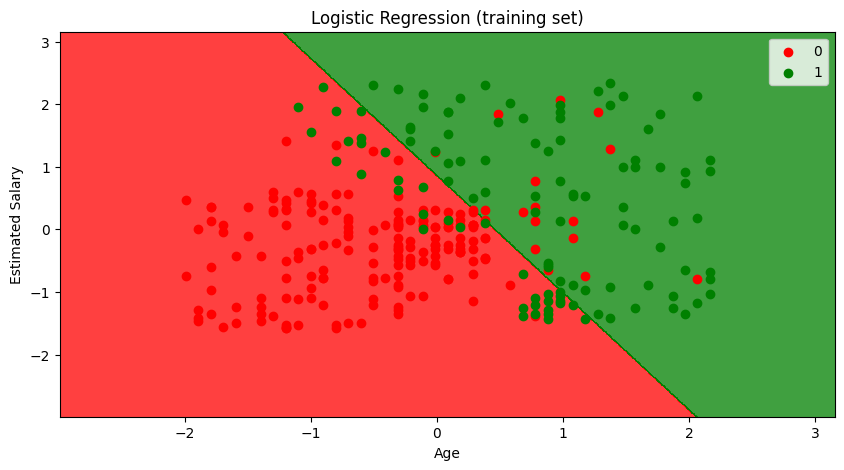

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


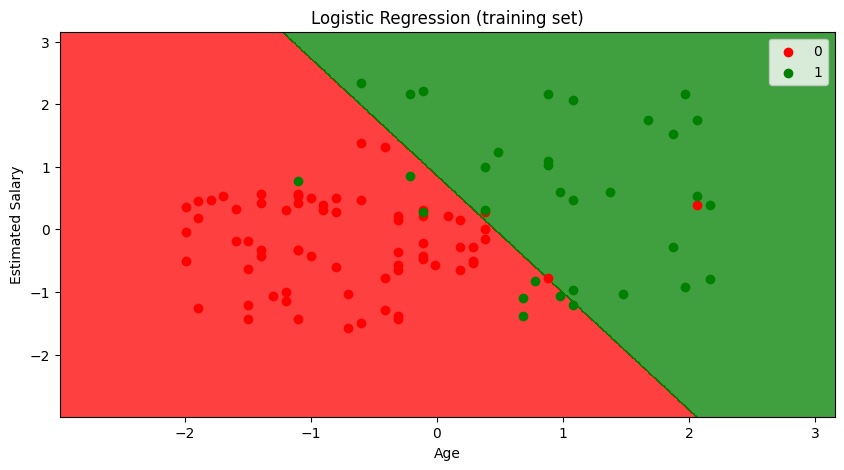

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [23]:
#Karmaşıklık Matrisi (Confusion Matrix)

In [ ]:
#Accuary : (Tn + Tp) / Tamamı
#Precision : Tp / (Fp + Tp)
#Recall veya Sensitiity : Tp / (Tp + Fn)
#Specificity : TN / (TN + FP)
#F1-Score : 2 * (Precision *  Recall) / (Precision + Recall)
#F-beta : (1 + Beta^2) * (precision * recall) / (Beta^2 * precision + recall)



In [24]:
#Support Vector Machines (Destek Vektör Makinaları)
##MMH (Maximum Marginal Hyperplane) : verileri ayıran doğru
#Destek vektörü: ayırıcı çizgilere en yakın konumlanmış veriler

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
import seaborn as sns; sns.set()

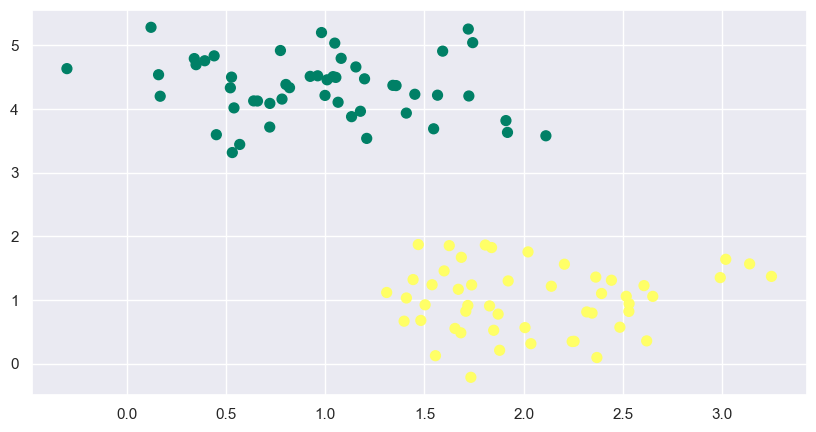

In [27]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state=0, cluster_std = 0.5)
plt.scatter(X[:,0],(X[:,1]), c=y, s= 50, cmap='summer')
plt.show()

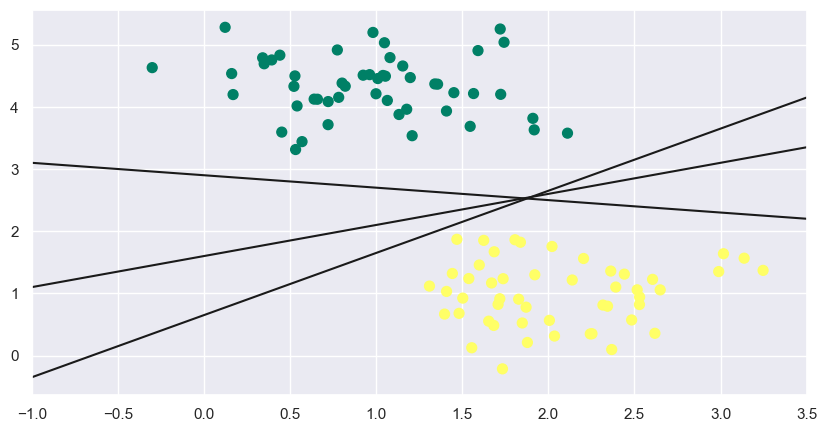

In [28]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],(X[:,1]), c=y, s= 50, cmap='summer')
for m, b in [(1,0.65),[0.5,1.6],[-0.2,2.9]]:
    plt.plot(xfit,m*xfit+b,'-k')

plt.xlim(-1,3.5)
plt.show()

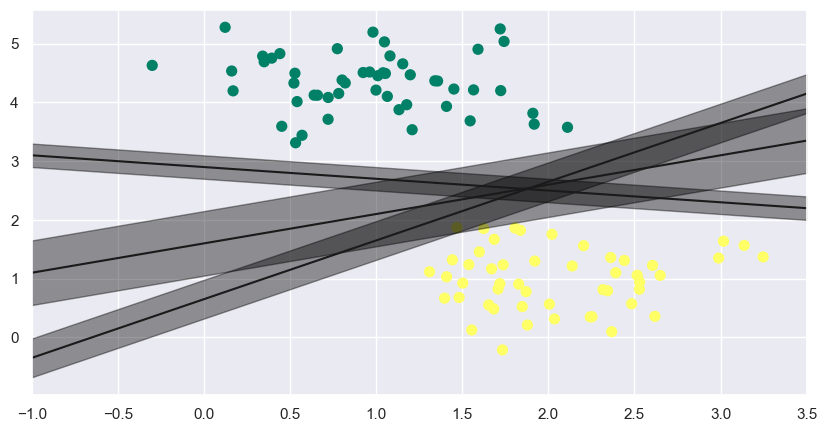

In [38]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],(X[:,1]), c=y, s= 50, cmap='summer')
for m, b, d in [(1,0.65,0.33),[0.5,1.6,0.55],[-0.2,2.9,0.2]]:
    yfit = m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit, yfit-d,yfit+d, edgecolor = 'none', color = '#000000',alpha = 0.4)
plt.xlim(-1,3.5)
plt.show()

In [30]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [31]:
#Kernel : linear, non-linear, polynomial, RBF (radial basis function), sigmoid


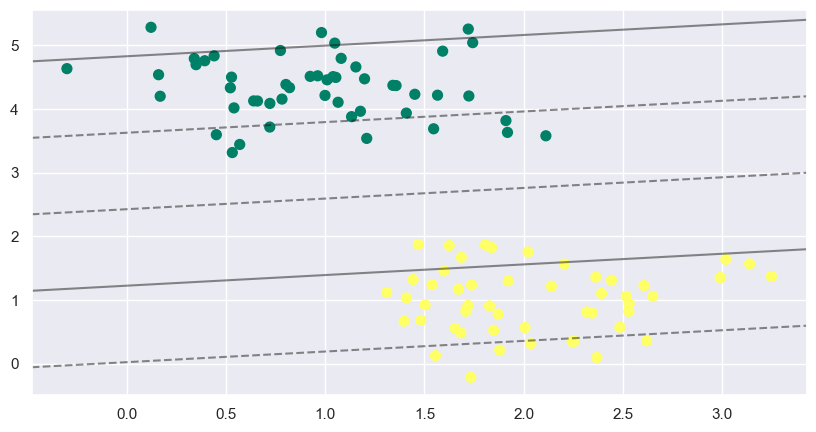

In [34]:
def decision_function(model, ax = None, plot_support = True):
    if ax == None:
        ax = plt.gca()#karar doğrusu
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y , X = np.meshgrid(y,x)
    
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors = 'k', level = [-1, 0, 1], alpha = 0.5, linestyles = ['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s = 300, linewidth = 1,
                   facecolor = 'none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
 
plt.scatter(X[:,0],(X[:,1]), c=y, s= 50, cmap='summer')
decision_function(model) 
    

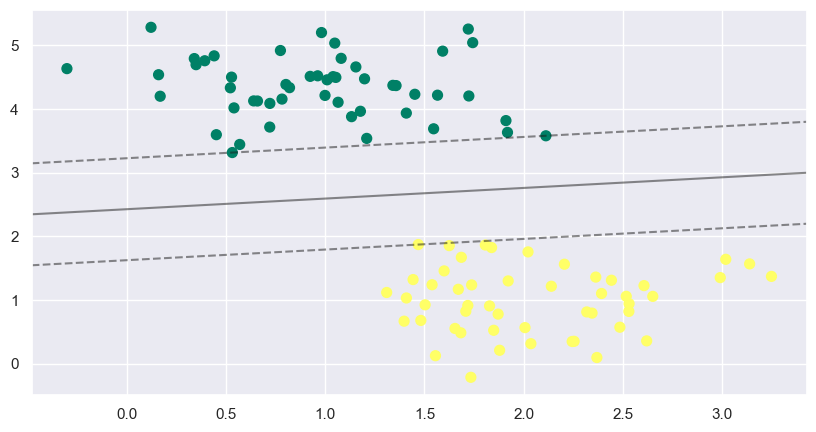

In [36]:
def decision_function(model, ax = None, plot_support = True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s = 300, linewidth = 1, facecolors = 'none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')
decision_function(model)


In [37]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])